<h1>Explore Baseball Data<\h1>

<h3>Ensure that you have set up the baseballDB (see - DBSetUp.ipynb) before running this notebook</h3>

<h4>Import Dependencies</h4>

In [1]:
%matplotlib inline

In [2]:
import os
import csv
import pandas as pd

import sqlite3
import csv
from sqlalchemy import create_engine

import matplotlib.pyplot as plt
import numpy as np

from config import password

<h4>Create a connection to SQL database</h4>

In [3]:
pg_user = 'postgres'
pg_password = password
db_name = 'baseballDB'

connection_string = f"{pg_user}:{pg_password}@localhost:5432/{db_name}"
engine = create_engine(f'postgresql://{connection_string}')

<h4>Read in databases tables as DatFrames</h4>

In [6]:
teamsDF = pd.read_sql_table("teams", con = engine)
battingDF = pd.read_sql_table("batting", con = engine)
pitchingDF = pd.read_sql_table("pitching", con = engine)
playersDF = pd.read_sql_table("players", con = engine)
franchisesDF = pd.read_sql_table("franchises", con = engine)
salariesDF = pd.read_sql_table("salaries", con = engine)
locationsDF = pd.read_sql_table("locations", con = engine)

In [7]:
teamsDF.head()

,yearID,teamID,franchID,G,W,R,H,HR,BB,SO,SB,RA,ERA,HA,HRA,BBA,SOA
0,1871,BS1,BNA,31,20,401,426,3,60.0,19.0,73.0,303,3.55,367,2,42,23
1,1871,CH1,CNA,28,19,302,323,10,60.0,22.0,69.0,241,2.76,308,6,28,22
2,1871,CL1,CFC,29,10,249,328,7,26.0,25.0,18.0,341,4.11,346,13,53,34
3,1871,FW1,KEK,19,7,137,178,2,33.0,9.0,16.0,243,5.17,261,5,21,17
4,1871,NY2,NNA,33,16,302,403,1,33.0,15.0,46.0,313,3.72,373,7,42,22


In [8]:
teamsDF["winPct"] = teamsDF.W / teamsDF.G
teamsDF["runsPerGame"] = teamsDF.R / teamsDF.G
teamsDF.head()

,yearID,teamID,franchID,G,W,R,H,HR,BB,SO,SB,RA,ERA,HA,HRA,BBA,SOA,winPct,runsPerGame
0,1871,BS1,BNA,31,20,401,426,3,60.0,19.0,73.0,303,3.55,367,2,42,23,0.645161,12.935484
1,1871,CH1,CNA,28,19,302,323,10,60.0,22.0,69.0,241,2.76,308,6,28,22,0.678571,10.785714
2,1871,CL1,CFC,29,10,249,328,7,26.0,25.0,18.0,341,4.11,346,13,53,34,0.344828,8.586207
3,1871,FW1,KEK,19,7,137,178,2,33.0,9.0,16.0,243,5.17,261,5,21,17,0.368421,7.210526
4,1871,NY2,NNA,33,16,302,403,1,33.0,15.0,46.0,313,3.72,373,7,42,22,0.484848,9.151515


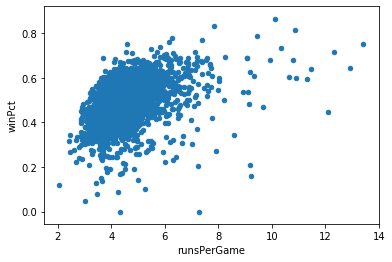

In [9]:
teamsDF.plot.scatter(x = "runsPerGame",
                    y = "winPct")